<div style="float: right; margin: 0px 15px 15px 0px; text-align: center;">
   
</div>
<B style="list-style-type: none; font-size: 36px; color: DarkBlue; margin-top: 0;">Superstore Analysis </B><br>
<em style="color: #808080;"> <strong>Python For Data Analysts: Methods And Tools</strong></em><br><br>



<span style="color: #808080;"><b></b> Hult International Business School <br></span>
<span style="color: #808080;"><b></b> Margaux Corens<br></span>

# Ignore Warnings

In [39]:
import warnings
warnings.filterwarnings("ignore")

# Libraries

In [40]:
import matplotlib.pyplot as plt   #matplotlib for data visualization 
import numpy as np   # numpy for numerical computations
import pandas as pd   # pandas for data manipulations
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Database Path 

In [41]:
data_path = "./data/"
store_filename = "Superstore Analysis_data_Margaux Corens.csv"
store_df_data = pd.read_csv(data_path + store_filename, encoding='ISO-8859-1')
store_df = store_df_data.copy()

# Missing Values & Duplicate Entries

In [42]:
missing_values = store_df.isnull().sum()
missing_values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [43]:
duplicate_rows = store_df.duplicated().sum()
duplicate_rows

0

There are no missing values or duplicate entries. 

# Checking Variable Datatypes

In [44]:
store_df.info()
pd.set_option('display.max_columns', None)
store_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1356,1357,US-2014-160444,7/5/2014,7/5/2014,Same Day,DC-12850,Dan Campbell,Consumer,United States,Houston,Texas,77036,Central,OFF-ST-10000563,Office Supplies,Storage,Fellowes Bankers Box Stor/Drawer Steel Plus,281.424,11,0.2,-35.1780
696,697,CA-2015-119291,5/14/2015,5/17/2015,First Class,JO-15550,Jesus Ocampo,Home Office,United States,Chester,Pennsylvania,19013,East,OFF-EN-10000927,Office Supplies,Envelopes,Jet-Pak Recycled Peel 'N' Seal Padded Mailers,200.984,7,0.2,62.8075
7953,7954,CA-2014-138359,4/1/2014,4/6/2014,Standard Class,KH-16330,Katharine Harms,Corporate,United States,Revere,Massachusetts,2151,East,OFF-ST-10000636,Office Supplies,Storage,Rogers Profile Extra Capacity Storage Tub,66.960,4,0.0,2.6784
6337,6338,CA-2016-165995,8/30/2016,9/6/2016,Standard Class,BG-11740,Bruce Geld,Consumer,United States,Los Angeles,California,90008,West,TEC-PH-10004908,Technology,Phones,Panasonic KX TS3282W Corded phone,339.960,5,0.2,42.4950
5915,5916,US-2015-126977,9/17/2015,9/23/2015,Standard Class,PF-19120,Peter Fuller,Consumer,United States,New York City,New York,10035,East,FUR-CH-10001973,Furniture,Chairs,Office Star Flex Back Scooter Chair with White...,199.764,2,0.1,8.8784


Conclusion on the datatypes: 
- Row Id: int
- Order ID: change to string
- Order Date: change to datetime
- Ship Date: change to datetime
- Ship Mode: change to categorical
- Customer ID: change to string
- Customer name: change to string 
- Segment: change to categorical
- Country: change to categorical
- City: change to categorical 
- State: change to categorical 
- Postal Code: int
- Region: change to categorical 
- Product ID: change to string
- Category: change to categorical 
- Sub-Category: change to categorical 
- Product Name: change to string
- Sales: float
- Quantity: int
- Discount: float
- Profit: float

Dates can be split into Year, Month, and Day.

# Converting Necessary Datatypes and Adding Variables

In [45]:
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
string_columns= ['Order ID','Customer ID','Customer Name','Product ID','Product Name']

for col in categorical_columns:
    store_df[col] = store_df[col].astype('category')

for col in string_columns:
    store_df[col] = store_df[col].astype('string')

store_df['Order Date'] = pd.to_datetime(store_df['Order Date'])
store_df['Ship Date'] = pd.to_datetime(store_df['Ship Date'])

store_df['Order Year'] = pd.DatetimeIndex(store_df['Order Date']).year
store_df['Order Month'] = pd.DatetimeIndex(store_df['Order Date']).month
store_df['Order Day'] = pd.DatetimeIndex(store_df['Order Date']).day

store_df['Ship Year'] = pd.DatetimeIndex(store_df['Order Date']).year
store_df['Ship Month'] = pd.DatetimeIndex(store_df['Order Date']).month
store_df['Ship Day'] = pd.DatetimeIndex(store_df['Order Date']).day

In [46]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   string        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   category      
 5   Customer ID    9994 non-null   string        
 6   Customer Name  9994 non-null   string        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   category      
 9   City           9994 non-null   category      
 10  State          9994 non-null   category      
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   category      
 13  Product ID     9994 non-null   string        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

# Data Exploration 

### Descriptive Statistics

In [47]:
store_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,15.468481,2015.722233,7.809686,15.468481
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,8.000000,2015.000000,5.000000,8.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,15.000000,2016.000000,9.000000,15.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,23.000000,2017.000000,11.000000,23.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,31.000000,2017.000000,12.000000,31.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,8.748327,1.123555,3.284654,8.748327


- 9994 data entries
- Orders are dated between Jan 3, 2014 and Dec 30, 2017
- Shipped orders are dated between Jan 7, 2014 and Jan 5, 2018
- Profits can be severely negative (although still smaller than the largest positive profit)

### Correlation

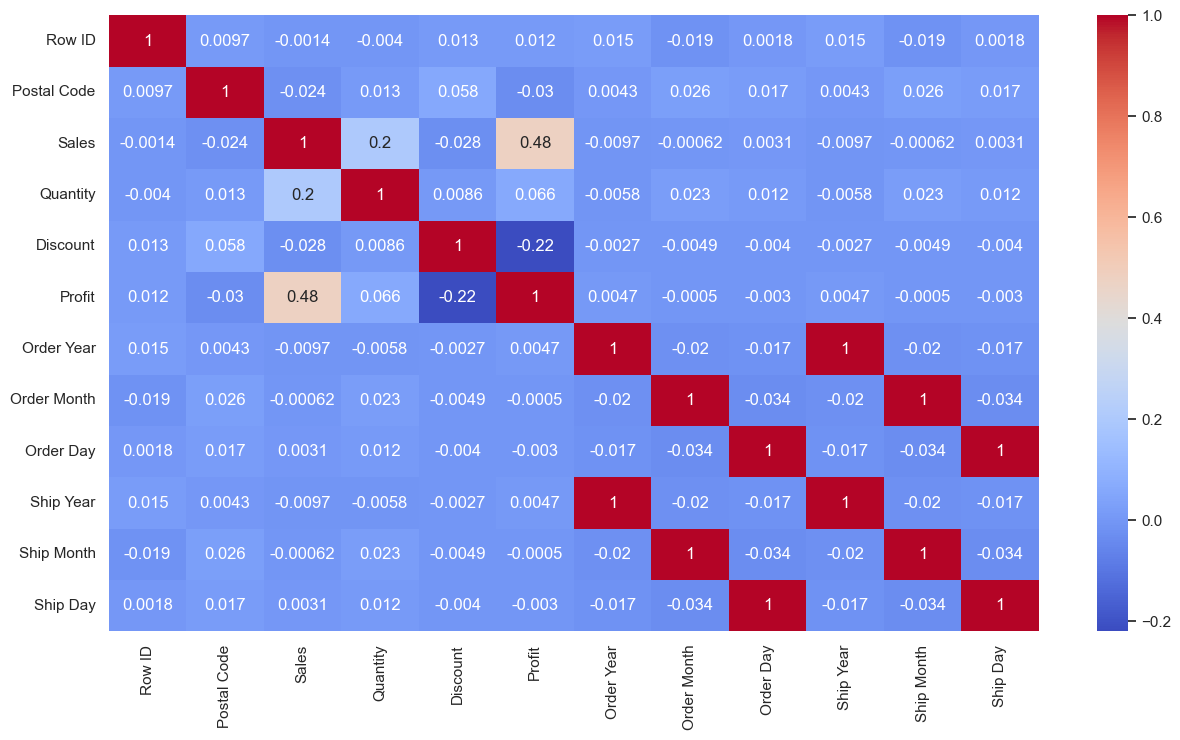

In [48]:
plt.figure(figsize= (15,8))
sns.heatmap(store_df.select_dtypes(np.number).corr(), annot= True, cmap= 'coolwarm');

High correlation between profit and sales and moderate correlation between quantity and sales, which is to be expected. There's also a significant negative correlation between discount and profit.


### Numerical Variables

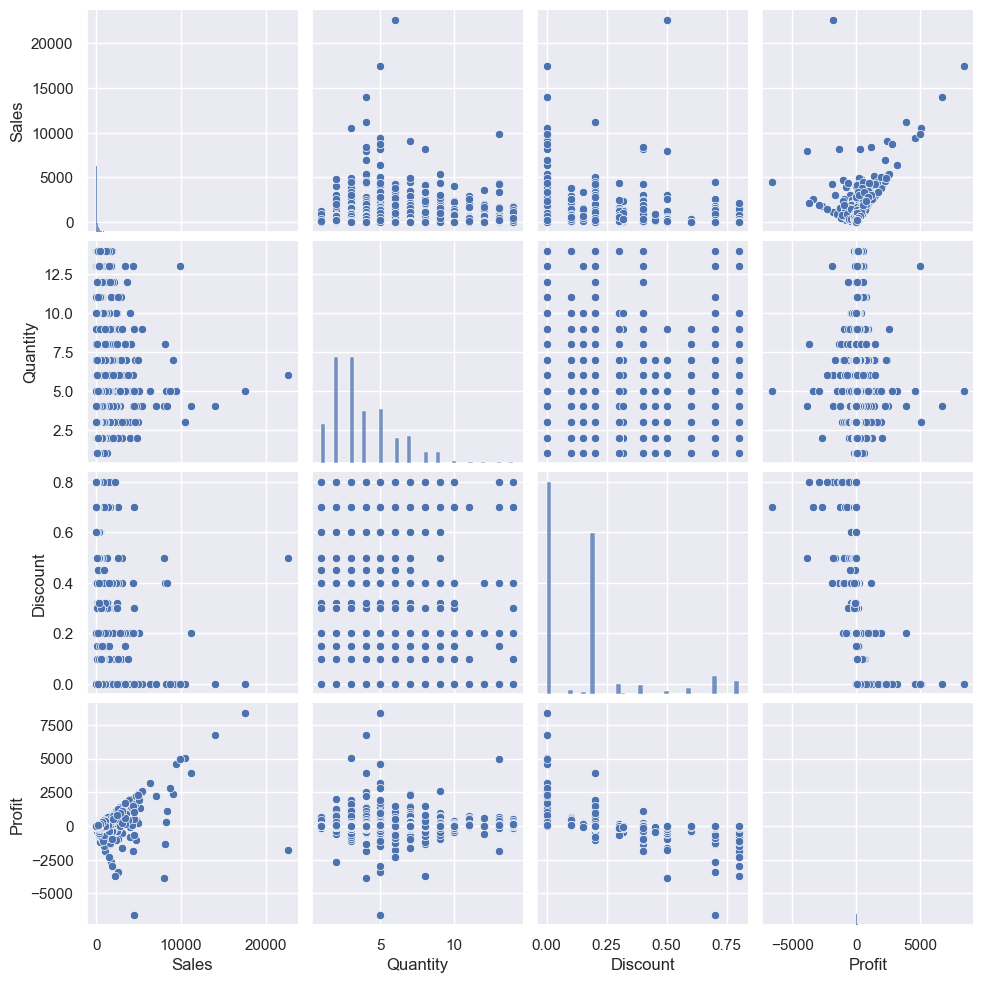

In [49]:
sns.pairplot(store_df, vars= ['Sales', 'Quantity','Discount','Profit']);

There's a significant amount of sales with negative profits (or losses). Profit is correlated with discounts, this is also clear in the pair plot, showing that higher discounts tend to have lower profits. 

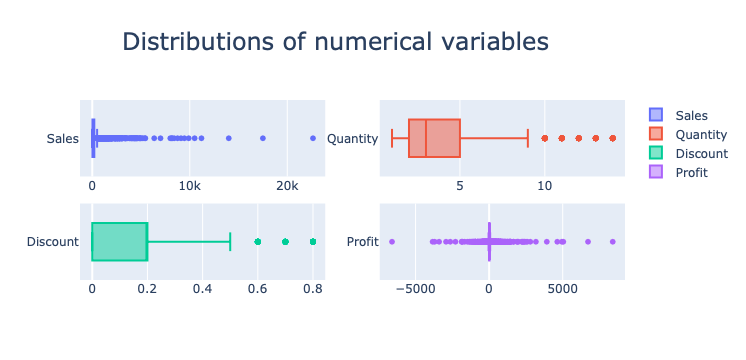

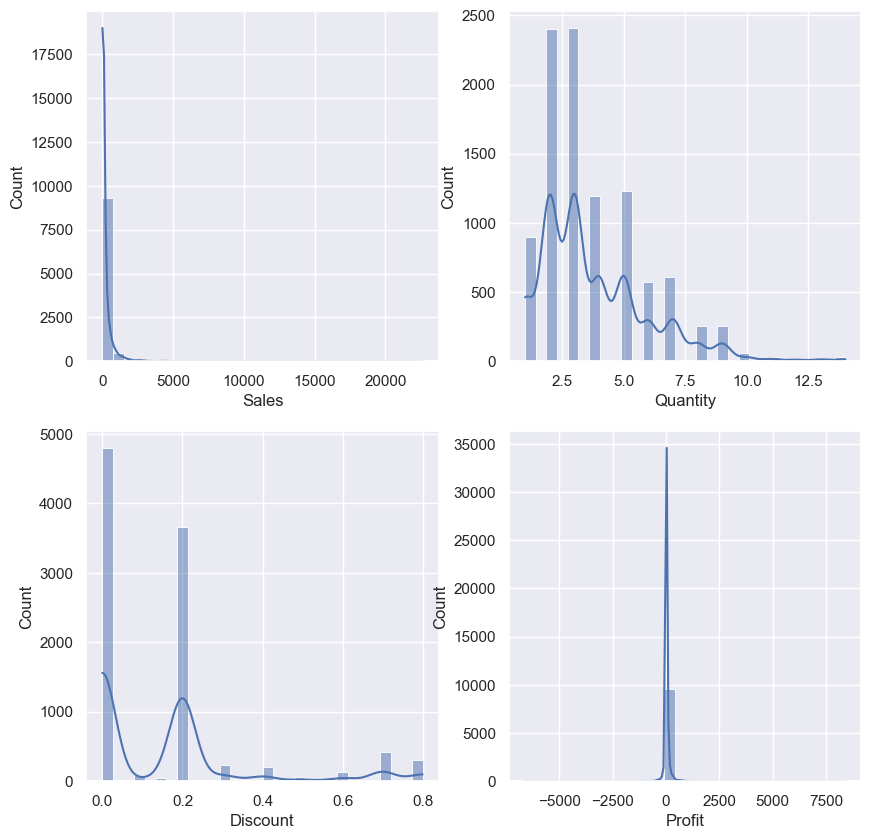

In [50]:
outlier_df = store_df.copy()

plt.subplot(221)
sns.histplot(outlier_df, x="Sales", bins=30,kde=True)

plt.subplot(222)
sns.histplot(outlier_df, x="Quantity", bins=30,kde=True)

plt.subplot(223)
sns.histplot(outlier_df, x="Discount", bins=30,kde=True)

plt.subplot(224)
sns.histplot(outlier_df, x="Profit", bins=30,kde=True)
fig = plt.gcf()
fig.set_size_inches(10,10)

# Distributions of numerical variables before removing outliers
sales = go.Box(x=outlier_df['Sales'],name='Sales')
Quantity = go.Box(x=outlier_df['Quantity'],name='Quantity')
Discount = go.Box(x=outlier_df['Discount'],name='Discount')
Profit = go.Box(x=outlier_df['Profit'],name='Profit')

fig = make_subplots(rows=2, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Discount, row = 2, col = 1)
fig.append_trace(Profit, row = 2, col = 2)

fig.update_layout(
    title_text = 'Distributions of numerical variables',
    title_font_size = 24,
    title_x=0.45)

fig.show()

There are some noticeable outliers in these variables, these will be deleted and boxplots will be shown again. 

In [51]:
store_df.drop(store_df[(store_df['Sales'] > 15000)].index, inplace=True)
store_df.drop(store_df[(store_df['Profit'] > 6000) | (store_df['Profit'] < -5000)].index, inplace=True)
store_df.drop(store_df[(store_df['Discount'] > 0.6)].index, inplace=True)
store_df.drop(store_df[(store_df['Quantity'] > 12)].index, inplace=True)

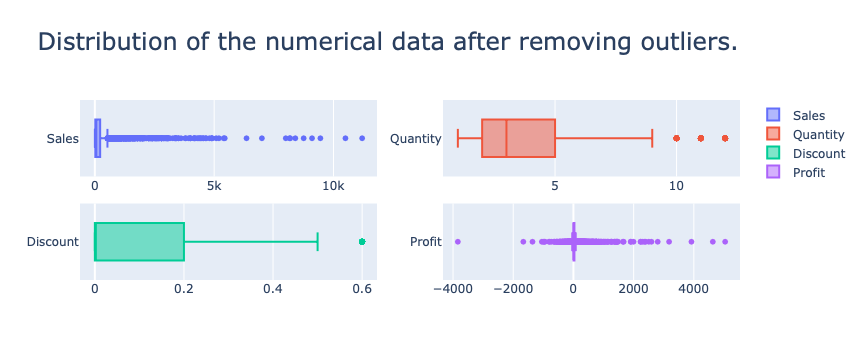

In [52]:
# Distributions of numerical variables after removing outliers
sales = go.Box(x=store_df['Sales'],name='Sales')
Quantity = go.Box(x=store_df['Quantity'],name='Quantity')
Discount = go.Box(x=store_df['Discount'],name='Discount')
Profit = go.Box(x=store_df['Profit'],name='Profit')

fig = make_subplots(rows=2, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Discount, row = 2, col = 1)
fig.append_trace(Profit, row = 2, col = 2)

fig.update_layout(
    title_text = 'Distribution of the numerical data after removing outliers.',
    title_font_size = 24,
    title_x=0.45)

fig.show()

### Categorical Variables

Distribution of Ship Mode
--------------------------------------------------------------------------------


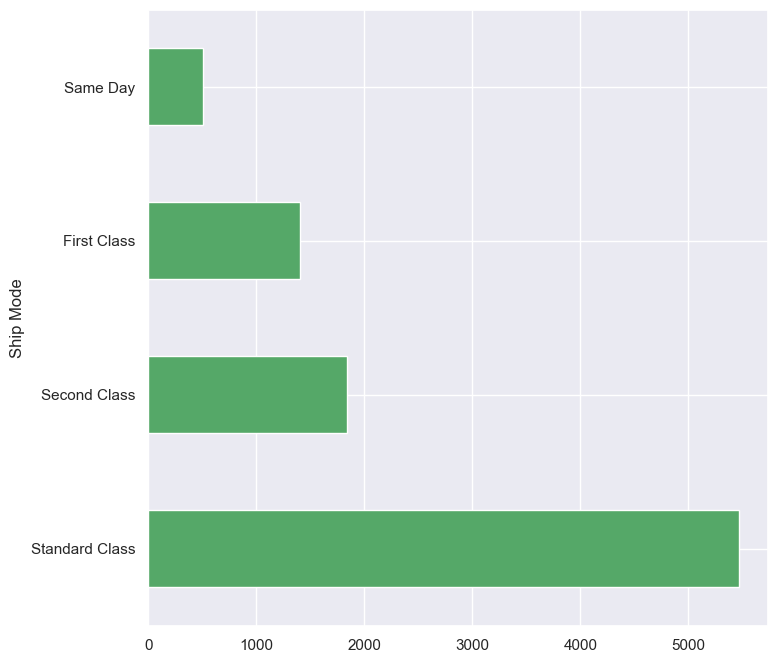

Distribution of Segment
--------------------------------------------------------------------------------


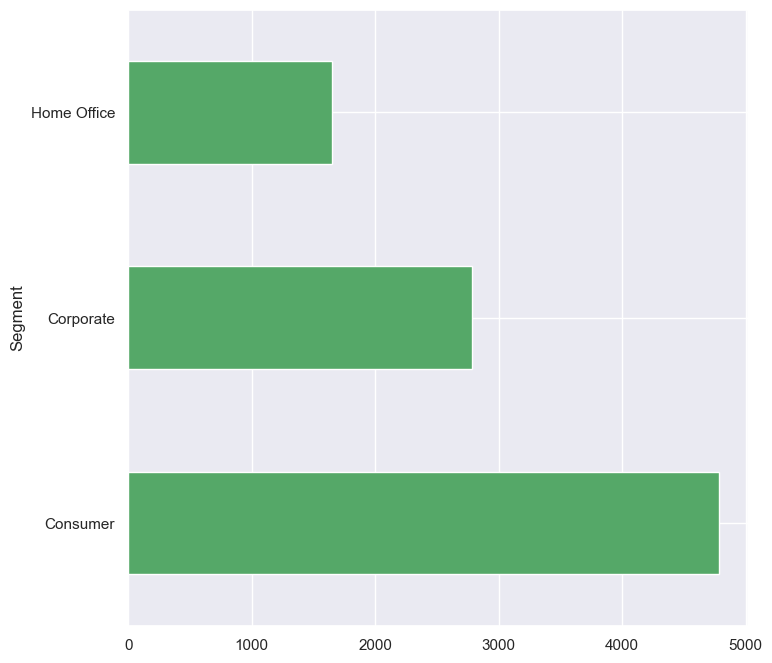

Distribution of Country
--------------------------------------------------------------------------------


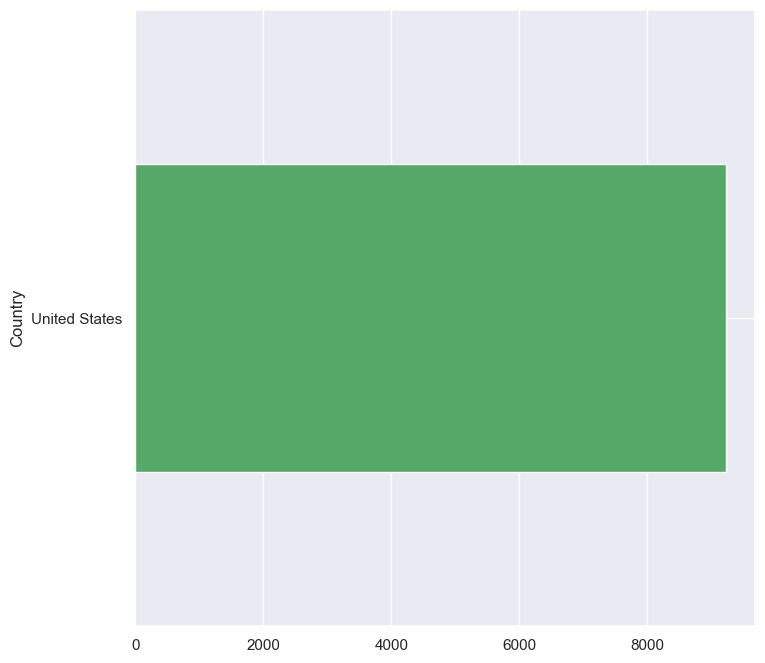

Distribution of City
--------------------------------------------------------------------------------


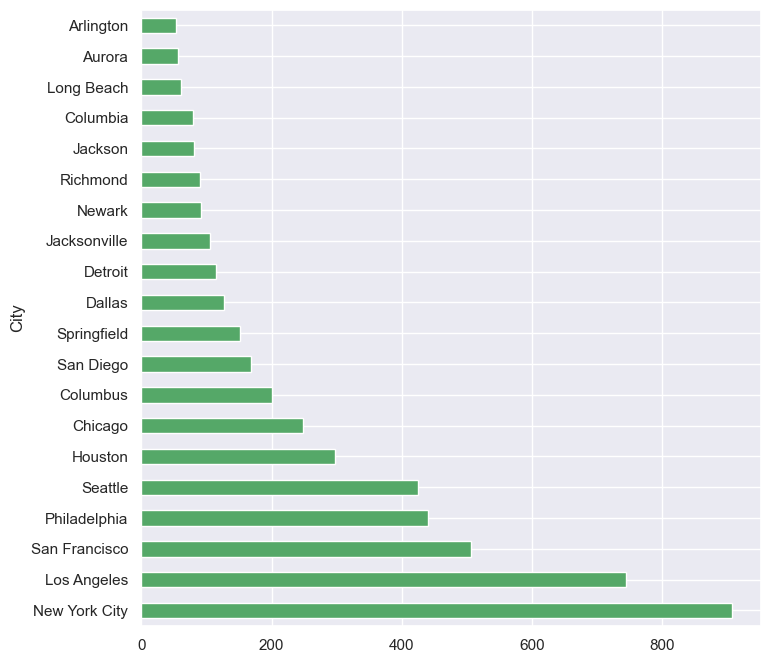

Distribution of State
--------------------------------------------------------------------------------


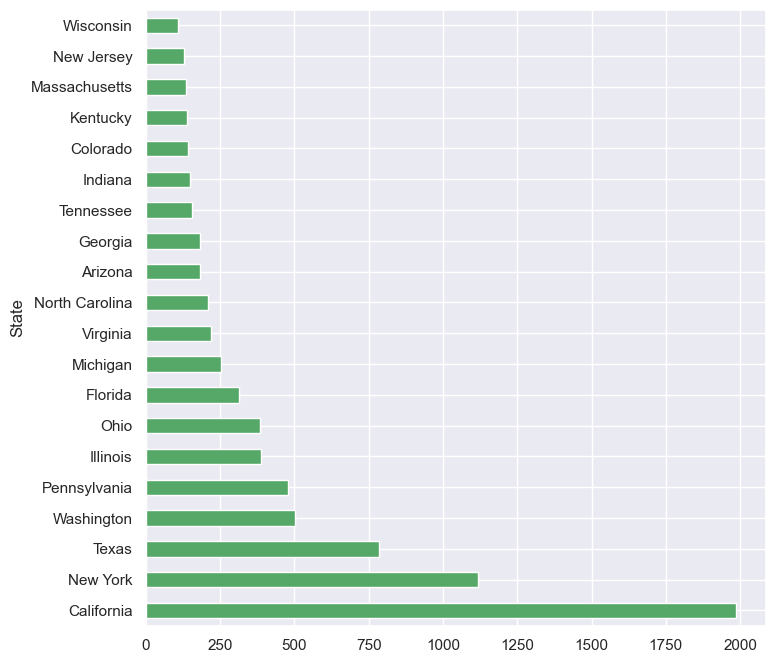

Distribution of Region
--------------------------------------------------------------------------------


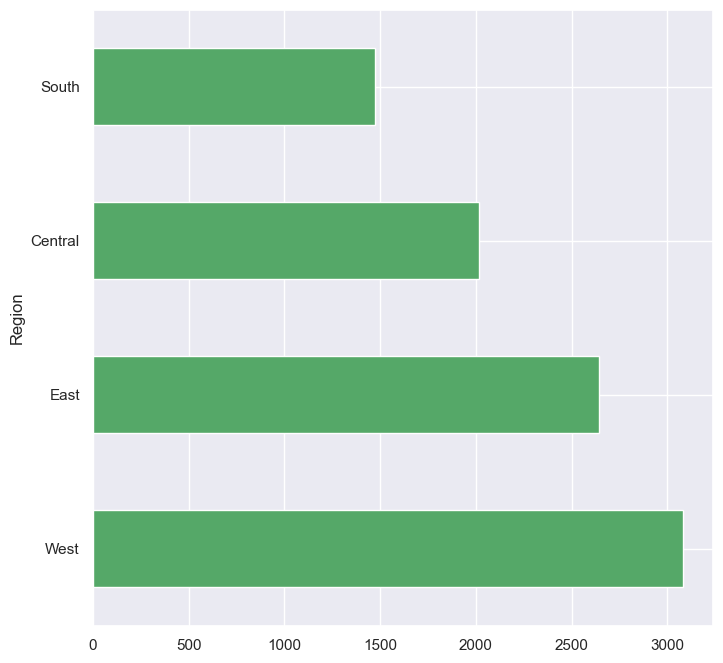

Distribution of Category
--------------------------------------------------------------------------------


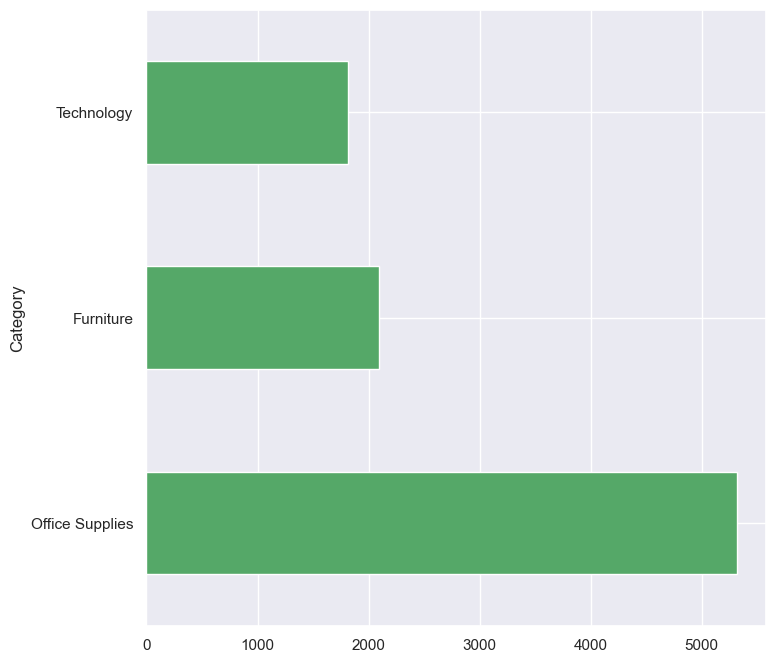

Distribution of Sub-Category
--------------------------------------------------------------------------------


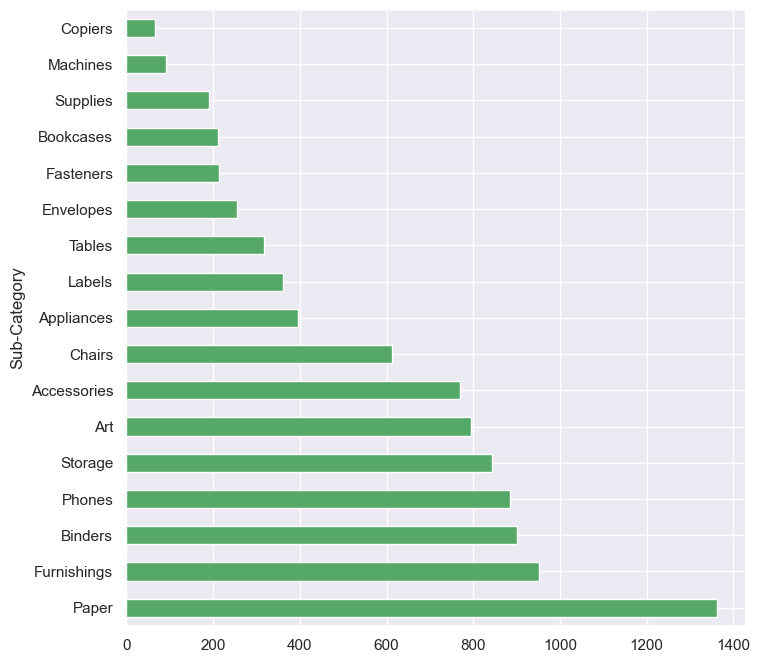

In [53]:
store_df_cat = store_df[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']]
def cat_analysis(col):
    print(f'Distribution of {col}')
    print('-' * 80)
     
    store_df_cat[col].value_counts().head(20).plot.barh(color = 'g')
    
    plt.show()

for j in store_df_cat:
    cat_analysis(j)

Categorical variables and their most popular value: 
- Ship Mode: Standard Class
- Segment: Consumer
- Country: United States (only value)
- City: New York City
- State: California
- Region: West
- Category: Office Supplies
- Sub-Category: Binders

### Total Sales per Year

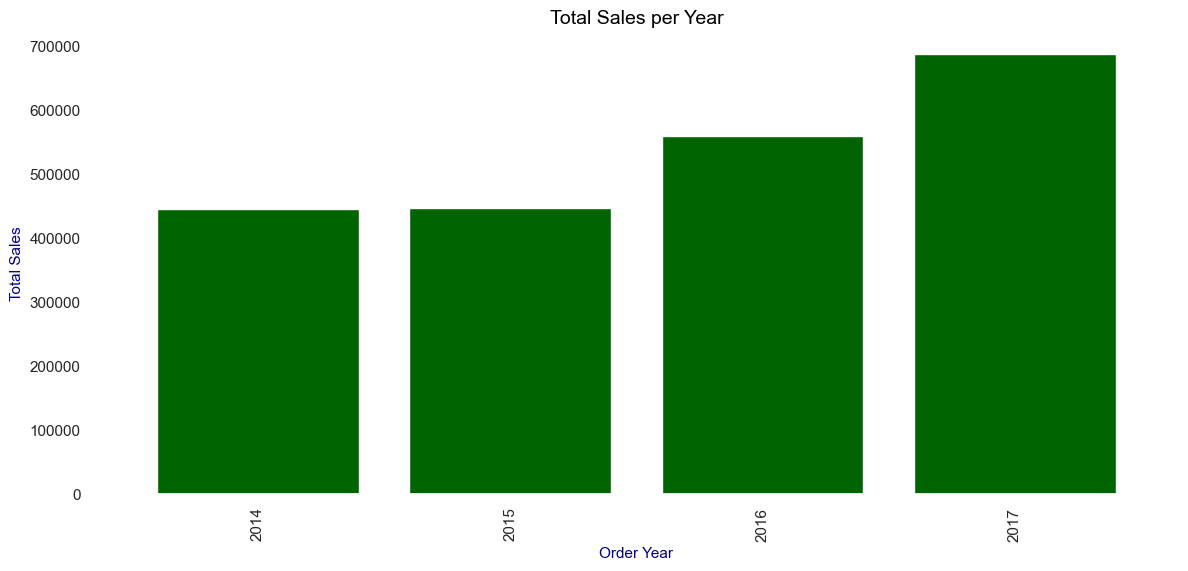

In [54]:
total_sales_per_year = store_df.groupby('Order Year')['Sales'].sum()

# Sort the years for the plot
total_sales_per_year = total_sales_per_year.loc[sorted(total_sales_per_year.index)]

# Create the figure with the desired aspect ratio
plt.figure(figsize=(14, 6))

# Plot the total sales per year with a white background
ax = total_sales_per_year.plot(kind='bar', color='darkgreen', width=0.8)
ax.set_facecolor('white')

# Set title and labels with specified colors and font sizes
plt.title('Total Sales per Year', color='black', fontsize=14)
plt.xlabel('Order Year', color='darkblue', fontsize=11)
plt.ylabel('Total Sales', color='darkblue', fontsize=11)

# Set the edge color of the plot to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Show the plot
plt.show()

Overall, total sales have been steadily increasing over the years, showing a slightly exponential increase in 2016 and 2017. 

### Sales Percentage Per Category

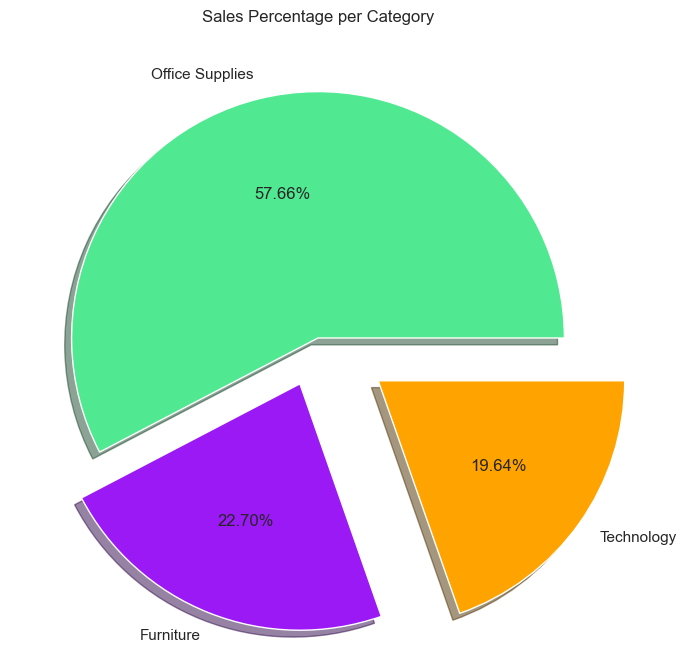

In [55]:
sns.set(rc = {'figure.figsize':(8,8)})
color = [ "#50e991", "#9b19f5", "#ffa300"]
category = store_df['Category'].value_counts()
plt.pie(category, labels = category.index, autopct = '%.2f%%',
        colors = color,
       explode = [0,0.2,0.3],shadow = True)
plt.title('Sales Percentage per Category')
plt.show()

Office Supplies is the biggest category generating over 50% of sales, followed by furniture and technology.

### Discount Analysis

<Axes: xlabel='Discount', ylabel='Density'>

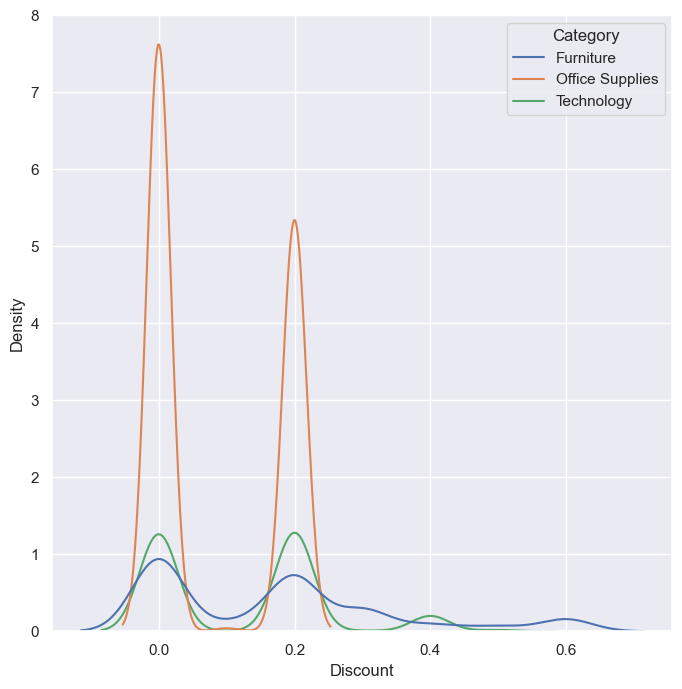

In [56]:
sns.kdeplot(store_df, x = store_df['Discount'], hue = store_df['Category'])

The category Office Supplies has a significantly higher discount than other categories, although it is also the most popular category so that could skew the data towards Office Supplies. 

# Hypotheses

### Hypothesis 1: Certain product categories significantly outperform others in terms of sales

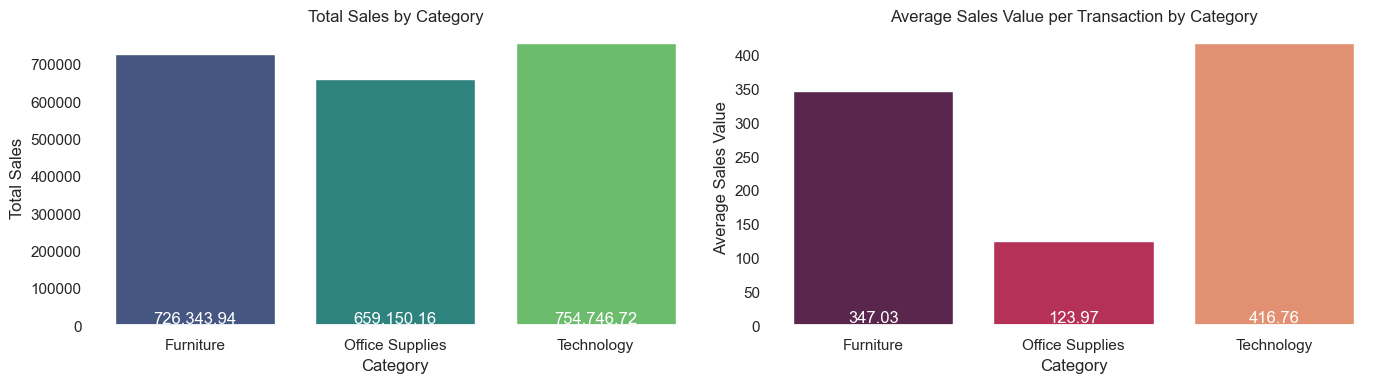

In [57]:
total_sales_by_category = store_df.groupby('Category')['Sales'].sum()
average_sales_by_category = store_df.groupby('Category')['Sales'].mean()

plt.figure(figsize=(14, 4))

ax1 = plt.subplot(1, 2, 1)
sns.barplot(x=total_sales_by_category.index, y=total_sales_by_category.values, palette="viridis")
ax1.set_title('Total Sales by Category')
ax1.set_ylabel('Total Sales')
ax1.set_xlabel('Category')
ax1.set_facecolor('white')  

for index, value in enumerate(total_sales_by_category.values):
    ax1.text(index, 0, f'{value:,.2f}', color='white', ha="center", va='bottom')

ax2 = plt.subplot(1, 2, 2)
sns.barplot(x=average_sales_by_category.index, y=average_sales_by_category.values, palette="rocket")
ax2.set_title('Average Sales Value per Transaction by Category')
ax2.set_ylabel('Average Sales Value')
ax2.set_xlabel('Category')
ax2.set_facecolor('white')  

for index, value in enumerate(average_sales_by_category.values):
    ax2.text(index, 0, f'{value:,.2f}', color='white', ha="center", va='bottom')

plt.gcf().set_facecolor('white')

plt.tight_layout()
plt.show()

The category Technology outperforms both Furniture and Office Supplies in terms of total sales by almost 100,000. Additionally, Technology has the highest average sales value per transaction by a wide margin, especially compared to Office Supplies. Hypothesis 1 can't be rejected since Technology outperforms the other two categories in total sales and average sales value per transaction. 

### Hypothesis 2: Sales volumes and profits vary significantly across different months of the year, indicating seasonality


Subhypothesis: The last quarter experiences higher sales each year

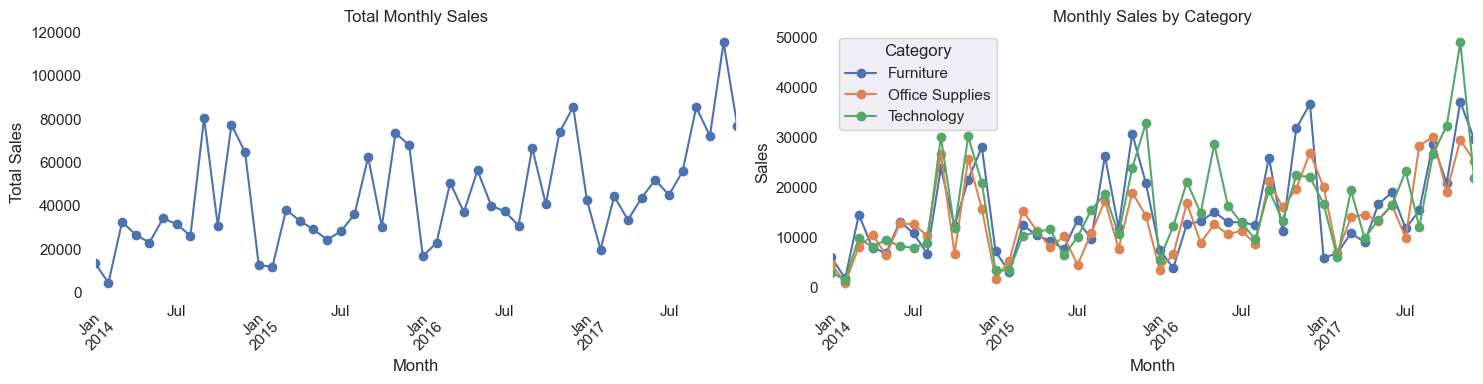

In [58]:
store_df['YearMonth'] = store_df['Order Date'].dt.to_period('M')
monthly_sales = store_df.groupby('YearMonth')['Sales'].sum()
monthly_sales_by_category = store_df.groupby(['YearMonth', 'Category'])['Sales'].sum().unstack()

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 2, 1)
monthly_sales.plot(kind='line', marker='o', color='b', ax=ax1)
ax1.set_title('Total Monthly Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_facecolor('white')  

ax2 = plt.subplot(1, 2, 2)
monthly_sales_by_category.plot(kind='line', marker='o', ax=ax2)
ax2.set_title('Monthly Sales by Category')
ax2.set_xlabel('Month')
ax2.set_ylabel('Sales')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_facecolor('white') 

plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

The total monthly sales graph displays clear seasonal trends, presenting a similar evolution over the years with prominent peaks towards the end of the year. This supports the sub-hypothesis that the last quarter experiences higher sales each year, likely due to the holiday season. Additionally, the graph visualizing monthly sales by category indicates that all categories experience these seasonal peaks, although Technology and Office Supplies seem to show more clear variation. Hypothesis 2 can not be rejected.

### Hypothesis 3: Higher discount levels negatively impact overall profit margins


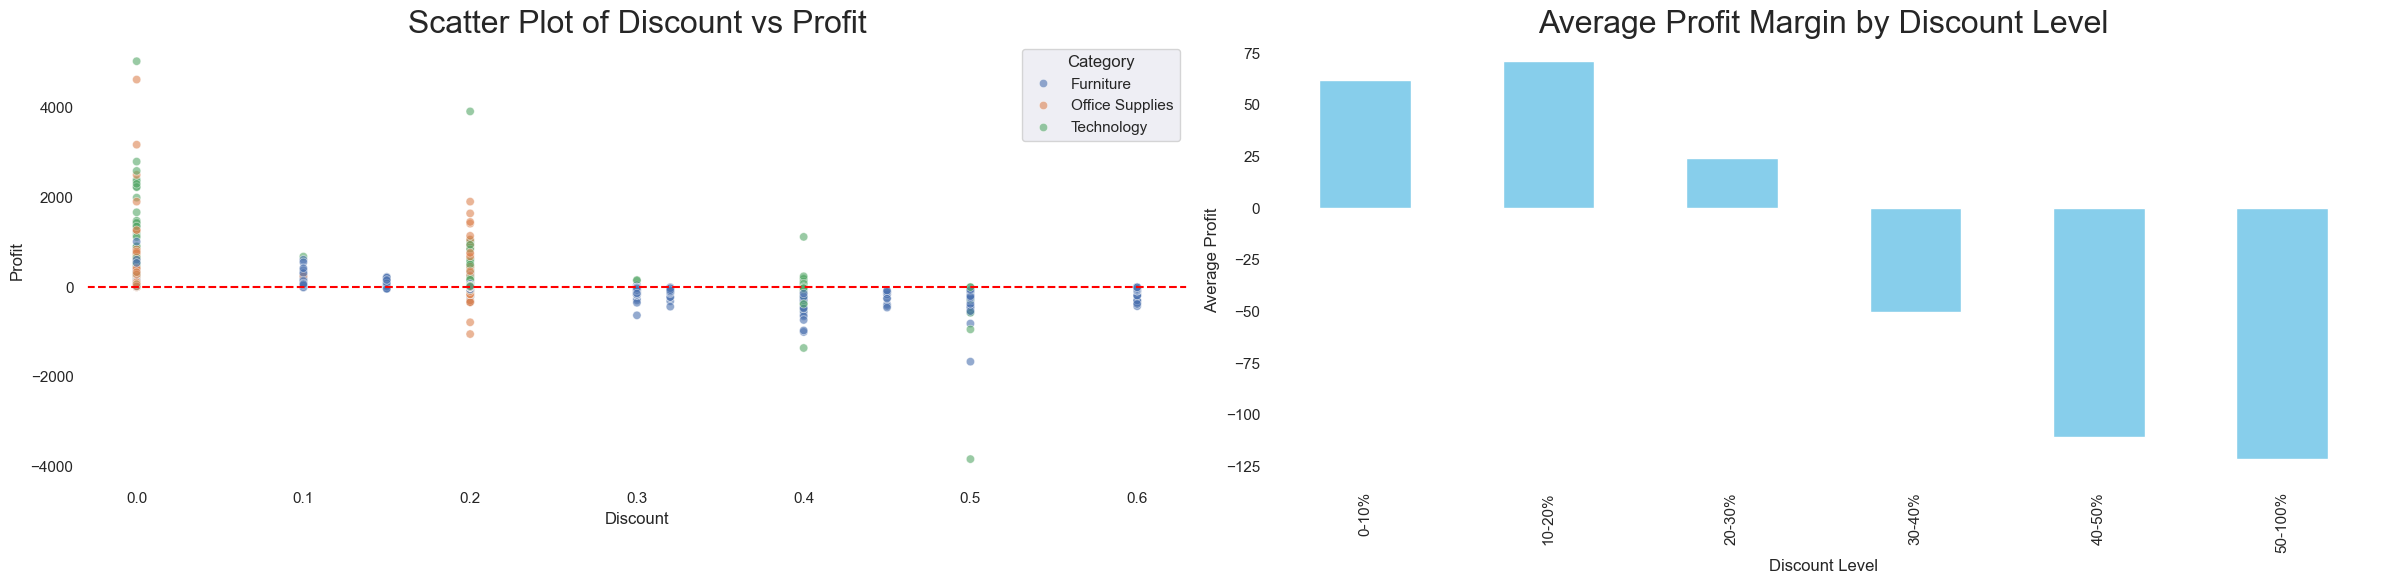

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), facecolor='white')

# Scatter Plot of Discount vs Profit
sns.scatterplot(data=store_df, x='Discount', y='Profit', hue='Category', alpha=0.6, ax=ax1)
ax1.set_title('Scatter Plot of Discount vs Profit', fontsize=23)  # Increased font size for the title
ax1.set_xlabel('Discount')
ax1.set_ylabel('Profit')
ax1.axhline(0, color='red', linestyle='--') 
ax1.set_facecolor('white')  # Set the subplot background to white

# Average Profit Margin by Discount Level
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%']
store_df['Discount Bin'] = pd.cut(store_df['Discount'], bins=bins, labels=labels, right=False)
average_profit_by_discount = store_df.groupby('Discount Bin')['Profit'].mean()
average_profit_by_discount.plot(kind='bar', color='skyblue', ax=ax2)
ax2.set_title('Average Profit Margin by Discount Level', fontsize=23)  # Increased font size for the title
ax2.set_xlabel('Discount Level')
ax2.set_ylabel('Average Profit')
ax2.set_facecolor('white')  # Set the subplot background to white

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The scatter plot shows a wide range of profits across different discount levels. There's a concentration of transactions around lower discounts and a general negative relationship between profits and discounts, as seen and confirmed in the correlation matrix earlier. The average profit margin by discount level graph further supports this, showing that higher discounts are associated with lower profits, indicating that discounts can drive sales while simultaneously lowering profit margins. Hypothesis 3 can not be rejected.

# Conclusion

The data from the Superstore dataset revealed insightful trends and patterns. The Technology category not only generates the most revenue but also boasts the highest average sales value per transaction, indicating its strong market position. Seasonal trends influence sales, with noticeable peaks during the end-of-year holidays, reflecting consumer behavior. Discounts were found to have a negative impact on profit margins, suggesting the importance of strategic discounting. Overall, these findings underscore the critical role of category performance, seasonality, and discount strategies in retail sales success.